## Requirements
  * pip install PyQt5

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from dataclasses import dataclass


@dataclass
class Line:
    m : int
    b : int

def fx(l, x):
    return l.m * x + l.b


def init():
    pass

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X, y)
    plt.xlabel('number of rooms')
    plt.ylabel('prices')

## Jargon

| Name | Description |
| ---- | ---- |
|Features | The properties we use to make our prediction|
|Labels | The target we try to predict from the features|
| Model | A rule or formula that predicts a label from the features|
|Prediction| The output form the model|
| Weights | In the model each feature gets multiplied by a corresponding factor |
| Bias | A constant that is not attached to the features |
| Slope | Measure of how steep the predicated line is.  In machine learning this is the weight of the corresponding feature |
| Y-Intercept | This is the bias |
| Linear Equation | Given a y-intercept and bias we can create a linear quation using y = mx + b |

## Single Linear and Multi variate linear equations

In [8]:
def linear_eq(feature, weight, bias):
    return feature * weight + bias

rooms=4
print("House Price with 4 rooms")
print(linear_eq(feature=rooms, weight=30, bias=100))

def linear_multiple_features(feature1, weight1,
                             feature2, weight2,
                             feature3, weight3,
                             feature4, weight4, bias):
    return feature1 * weight1 \
            + feature2 * weight2 \
            + feature3 * weight3 \
            + feature4 * weight4 \
            + bias

print("Hour Price with 4 rooms, size 10, school_quality 9, age 4")
print(linear_multiple_features(feature1=4, weight1=30,
                               feature2=10, weight2=10,
                               feature3=9, weight3=4,
                               feature4=4, weight4=2,
                               bias=100))

House Price with 4 rooms
220
Hour Price with 4 rooms, size 10, school_quality 9, age 4
364


# Moving a line closer to a set of points


## Moving a line by changing its gradient


<IPython.core.display.Javascript object>


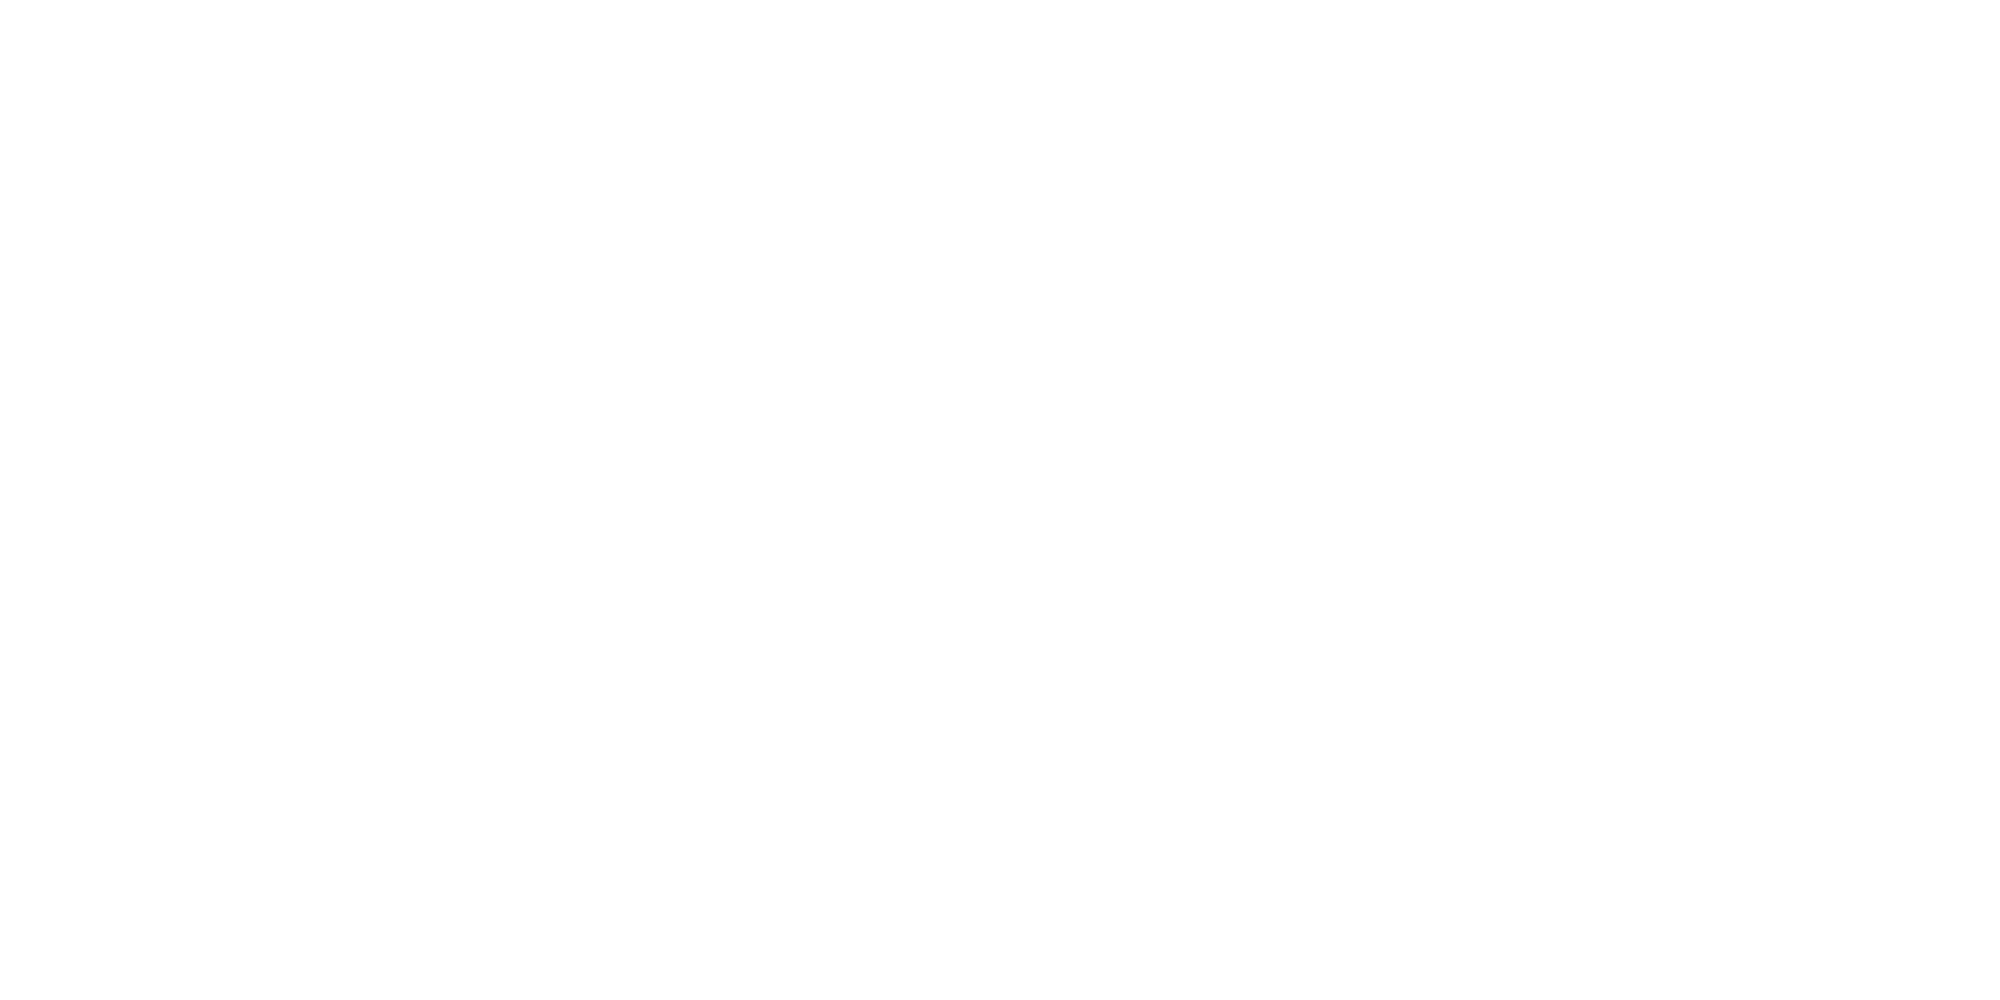

In [9]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.set_ylim(-50, 100)
axes.set_xlim(-50,100)


def animate_gradient(line, i):
    line.m += 1
    axes.plot(x_values,[fx(line, x) for x in x_values], color="red")

def animate_bias(line, i):
    line.b += 1
    print(line)
    axes.plot(x_values,[fx(line, x) for x in x_values], color="green")

        
line1 = Line(m=0,b=10)
        
x_values = [0, 10, 20, 30, 40, 50]
axes.plot(x_values, [fx(line1, x) for x in x_values], color="blue")


anim1 = FuncAnimation(fig, lambda i : animate_gradient(line1, i), interval=100, init_func=init,
                    repeat=False, frames=range(10))

plt.show()

<IPython.core.display.Javascript object>


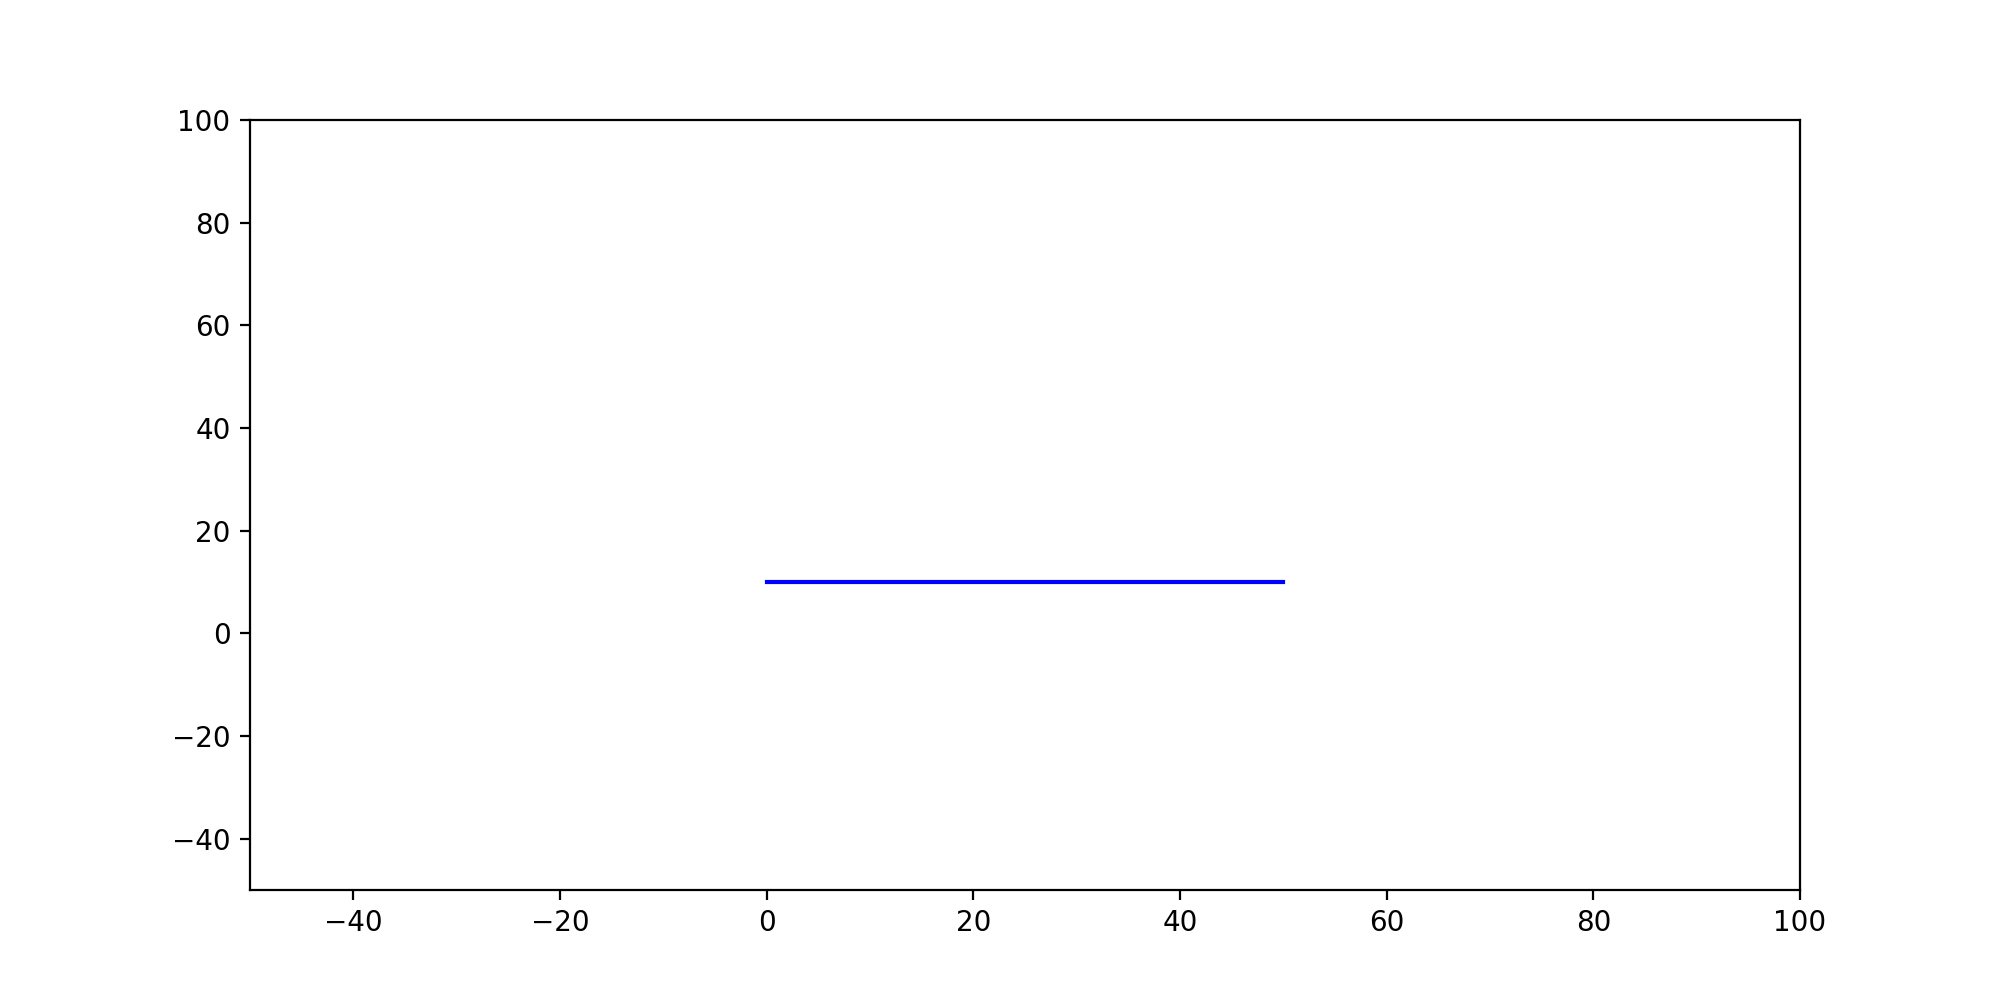

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.set_ylim(-50, 100)
axes.set_xlim(-50,100)


def animate_bias(line, i):
    line.b += 5
    print(line)
    if i < 10:
        axes.plot(x_values,[fx(line, x) for x in x_values], color="green")


        
line1 = Line(m=0,b=10)
        
x_values = [0, 10, 20, 30, 40, 50]
axes.plot(x_values, [fx(line1, x) for x in x_values], color="blue")


anim1 = FuncAnimation(fig, lambda i : animate_bias(line1, i), interval=100, init_func=init,
                    repeat=False, frames=range(10))


plt.show()

## Square trick

<IPython.core.display.Javascript object>


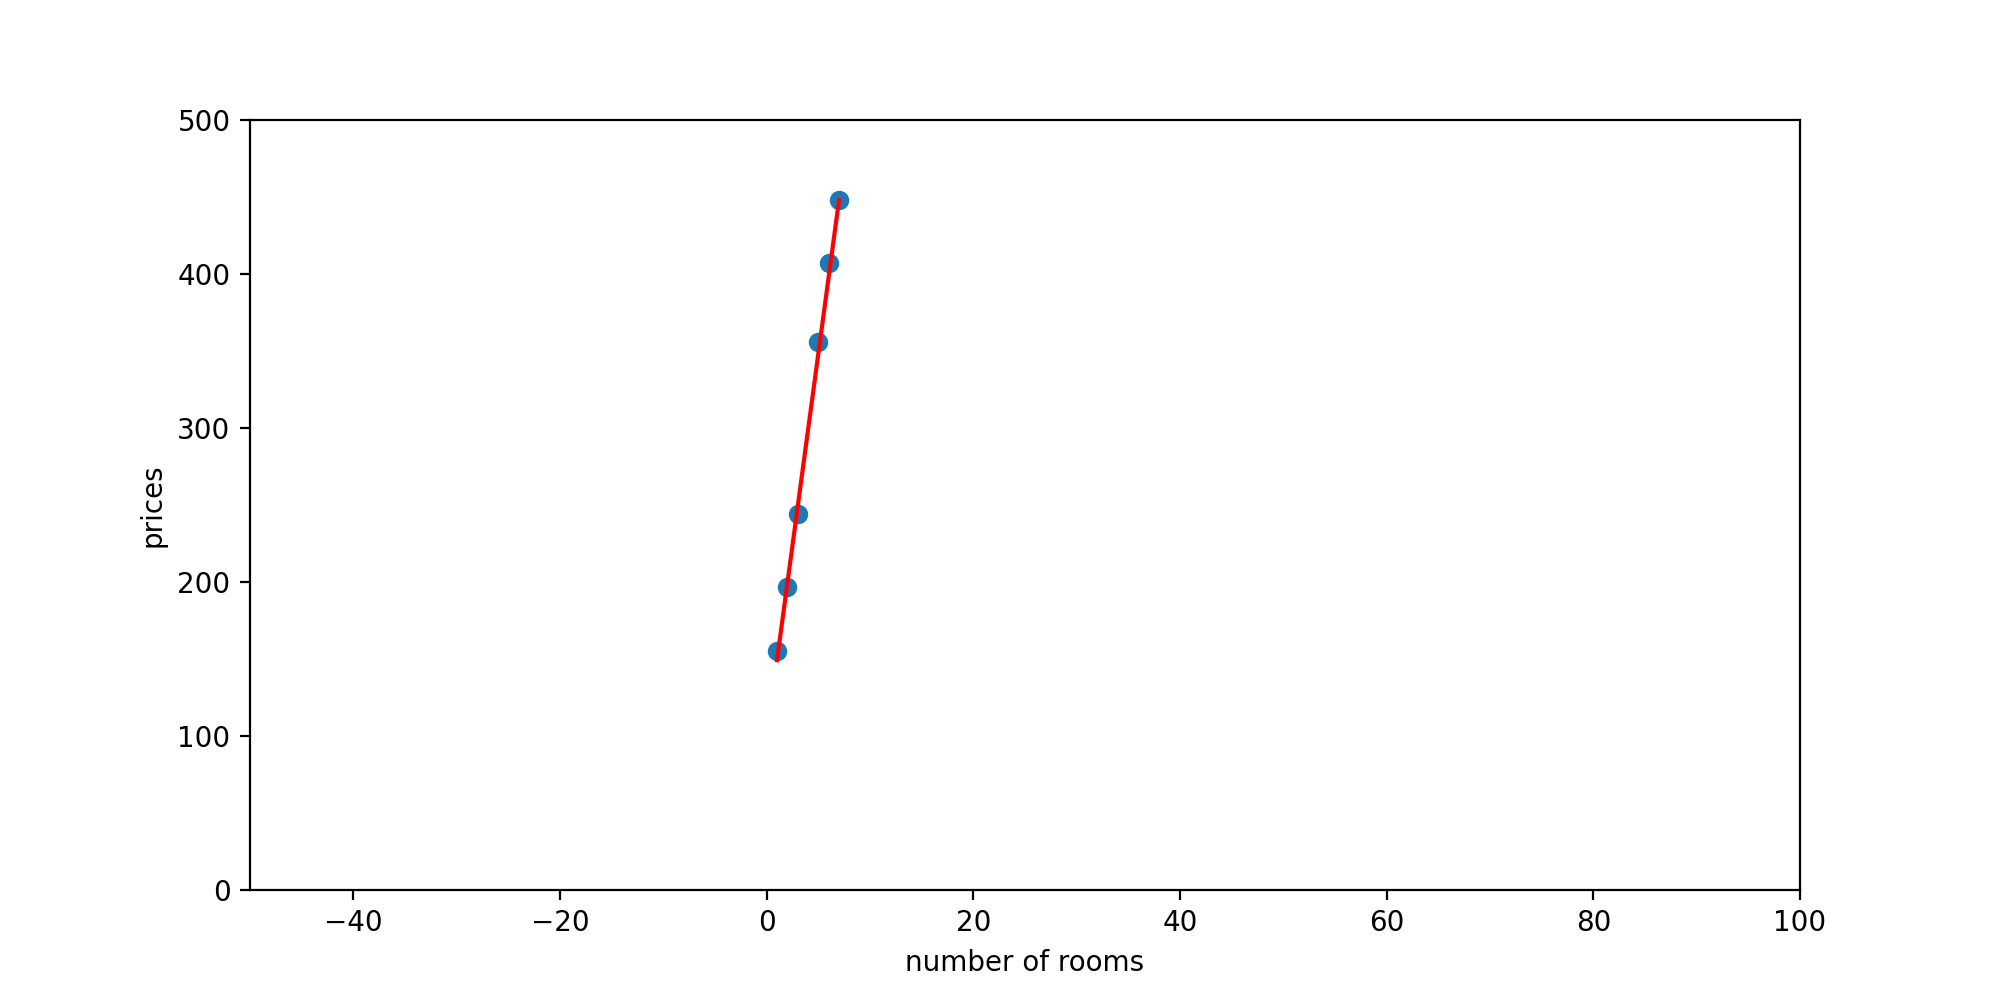

Price per room 49.77565134651793, base_price 99.44368728159168


In [11]:
import random
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.set_ylim(-50, 100)
axes.set_xlim(-50,100)

def square_trick(price_per_room, base_price, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    base_price += learning_rate*(price-predicted_price)
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    return price_per_room, base_price

def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(price_per_room,
                                                  base_price,
                                                  num_rooms,
                                                  price,
                                                  learning_rate)

    return price_per_room, base_price


import numpy as np
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356, 407, 448])

price_per_room, base_price = linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

print(f"Price per room {price_per_room}, base_price {base_price}")

plt.ylim(0,500)

plt.scatter(features, labels)
plt.xlabel('number of rooms')
plt.ylabel('prices')

plt.plot(features, [ x * price_per_room + base_price for x in features ], color="red")

plt.show()

<IPython.core.display.Javascript object>


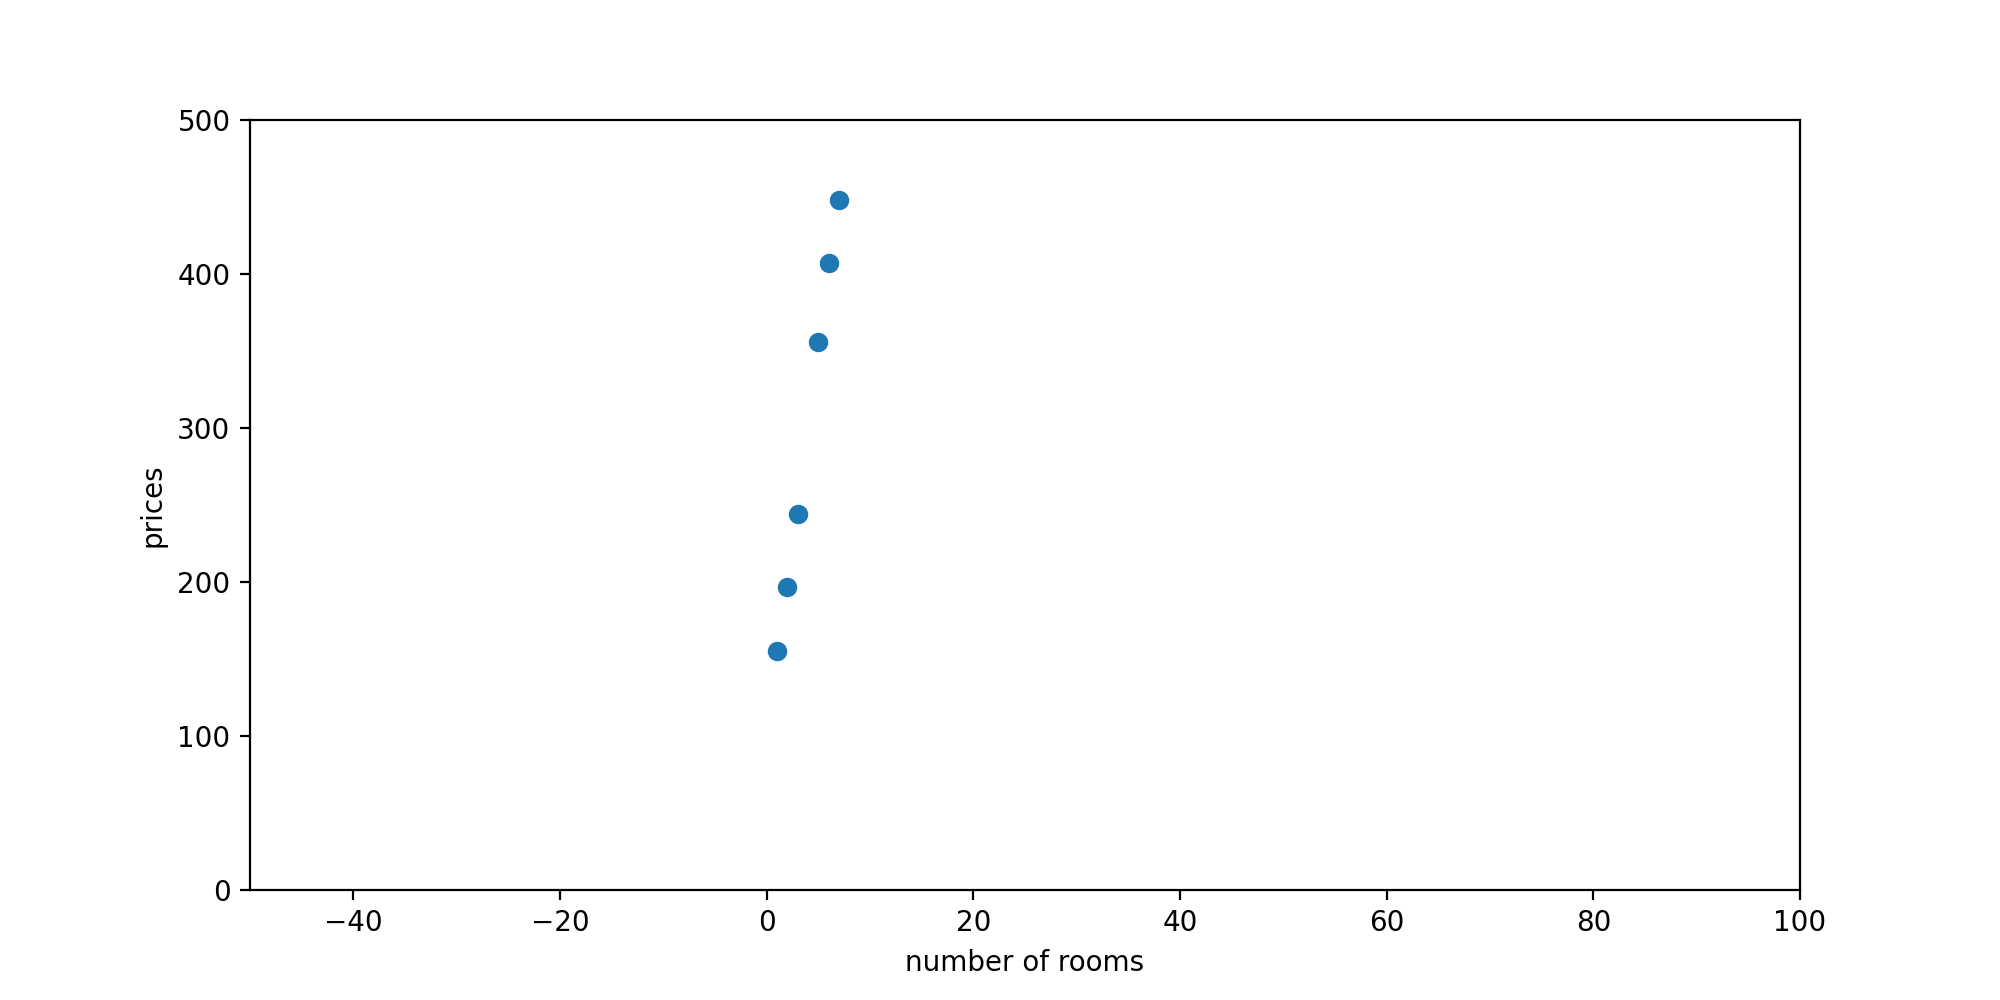

In [16]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.set_ylim(-50, 100)
axes.set_xlim(-50,100)

def square_trick(price_per_room, base_price, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    base_price += learning_rate*(price-predicted_price)
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    return price_per_room, base_price


    
def linear_regression_epoch(features, labels, 
                              price_per_room,
                              base_price,
                              learning_rate=0.01):
    i = random.randint(0, len(features)-1)
    num_rooms = features[i]
    price = labels[i]
    price_per_room, base_price = square_trick(price_per_room,
                                                  base_price,
                                                  num_rooms,
                                                  price,
                                                  learning_rate)

    return price_per_room, base_price


import numpy as np
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356, 407, 448])


plt.ylim(0,500)

plt.scatter(features, labels)
plt.xlabel('number of rooms')
plt.ylabel('prices')


base_price = random.random()
price_per_room = random.random()

def animate(i):
    price_per_room_1, base_price_2 = linear_regression_epoch(features, labels,
                                    price_per_room,
                                    base_price,
                                    learning_rate=0.01)
    price_per_room = price_per_room_1
    base_price = base_price_2
    print(price_per_room)
    plt.plot(features, [ x*price_per_room + base_price for x in features], color="blue")
    
    
anim1 = FuncAnimation(fig, lambda i : animate_bias(line1, i), interval=100, init_func=init,
                    repeat=False, frames=range(1000))


plt.show()

